# Task

## Objective:
Your task is to understand the given dataset, analyze each biomarker, and predict the outcome (Diabetes Insipidus) using the provided biomarkers. Additionally, you need to identify any biases in the data and comment on the usefulness of each parameter.

## Your task:

1. Comment on Biomarkers:
Based on the data provided and the knowledge acquired in the course, evaluate each biomarker. Discuss its significance and usability for diagnosis. Highlight the relevance of each biomarker in the context of the disease or condition being diagnosed.
2. Identify and Address Problems/Biases:
Analyze the data for potential problems or biases. This could include any of the biases we have discusses in class.
Discuss the expected effects of corrections on the dataset and subsequent analyses. Explain how these corrections will improve the reliability and validity of your results.
3. Parameter Importance Analysis:
Perform an analysis to determine the importance of different biomarkers.
Identify which biomarkers are the most critical for accurate diagnosis and discuss why they are significant.
4. Model Creation for Prognosis:
Using the corrected data and insights from the parameter importance analysis, develop a predictive model to provide a reliable diagnosis.
Explain the choice of model and justify why it is suitable for this task.
Validate the model using appropriate techniques such as cross-validation, and evaluate its performance using relevant metrics (e.g., accuracy, precision, recall, F1-score).

# Solution

## Evaluation of data elements.

1.	Urine osmolality:
- Significance: Urine osmolality measures the concentration of solutes in urine. It’s critical for diagnosing Diabetes Insipidus (DI) as patients with DI typically have dilute urine, leading to low urine osmolality.
- Usability: Highly relevant and useful for DI diagnosis. Lower values can indicate impaired urine concentration ability.
2.	Sodium:
- Significance: Serum sodium levels are essential in assessing electrolyte balance and can indicate water retention or depletion, which is relevant in DI cases.
- Usability: Important for diagnosis, as DI can cause imbalances in sodium levels due to excessive urination and subsequent dehydration.
3.	Copeptin test:
- Significance: Copeptin is a surrogate marker for arginine vasopressin (AVP), which is directly involved in water regulation. In DI, AVP levels are disrupted.
- Usability: Highly relevant as copeptin levels can help differentiate between types of DI and other conditions with similar symptoms.
4.	Glucose:
- Significance: Blood glucose levels are important to differentiate DI from other conditions like diabetes mellitus, which also presents with polyuria.
- Usability: Important for differential diagnosis but less direct relevance to DI compared to urine osmolality or copeptin.
5.	Feature engineering of sodium and copeptin:
- Significance: Combining biomarkers can sometimes reveal interactions or more subtle patterns that single markers cannot.
- Usability: This derived feature may provide additional insights and improve model accuracy.
6.	Time between first symptoms and diagnosis (in days):
- Significance: This measure can reflect the chronicity of the condition, which might affect biomarker levels and overall patient condition.
- Usability: Useful for understanding disease progression but indirectly relevant to biomarker efficacy.

It looks like there is no reason to exclude variables from analysis due to their insignificance in prediction of diabetes from the scientific point of view.

## EDA

In [1]:
!pip install tableone

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from tableone import TableOne, load_dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load the dataset
file_path = folder_path + '/biomarker_dataset.csv'
df = pd.read_csv(file_path)

In [5]:
df

,Urine osmolality,Sodium,Copeptin test,Glucose,Feature eng. of sodium and copeptin,Time between first symptoms and diagnosis (in days),Outcome
0,0.088850,-0.558571,-0.044022,-0.205063,-0.058439,0,0
1,0.345594,0.343953,-0.530874,0.442238,0.234942,51,1
2,0.790099,1.038287,-0.790693,0.817564,1.871504,0,1
3,0.905293,1.254929,-0.947177,0.522782,2.929458,8,1
4,0.279895,-0.324696,-0.625348,0.929489,0.370501,0,0
...,...,...,...,...,...,...,...
997,-0.018518,-0.589220,0.158954,-0.334438,0.084316,0,0
998,0.385349,0.959013,-0.375285,0.517539,1.547227,34,1
999,-0.346210,-0.489407,0.290889,-0.152735,0.636084,0,0
1000,999.000000,0.959013,-0.375285,0.517539,1.547227,34,1


In [6]:
df.describe()

,Urine osmolality,Sodium,Copeptin test,Glucose,Feature eng. of sodium and copeptin,Time between first symptoms and diagnosis (in days),Outcome
count,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000,1002.000000
mean,2.338916,0.421714,-0.359598,0.147107,1.099668,24.482036,0.497006
std,44.597606,0.656990,0.622017,0.504924,1.173573,31.958392,0.500241
min,-1.424271,-1.185126,-2.056621,-1.637505,-1.136456,0.000000,0.000000
25%,-0.011932,-0.093278,-0.820880,-0.171309,0.242512,0.000000,0.000000
50%,0.345594,0.440867,-0.360559,0.134889,0.880090,0.000000,0.000000
75%,0.703248,0.899744,0.055694,0.489430,1.733200,51.000000,1.000000
max,999.000000,2.232990,1.322518,1.597155,5.717749,100.000000,1.000000


In [7]:
df.head()

,Urine osmolality,Sodium,Copeptin test,Glucose,Feature eng. of sodium and copeptin,Time between first symptoms and diagnosis (in days),Outcome
0,0.088850,-0.558571,-0.044022,-0.205063,-0.058439,0,0
1,0.345594,0.343953,-0.530874,0.442238,0.234942,51,1
2,0.790099,1.038287,-0.790693,0.817564,1.871504,0,1
3,0.905293,1.254929,-0.947177,0.522782,2.929458,8,1
4,0.279895,-0.324696,-0.625348,0.929489,0.370501,0,0


### Negative values

Values for Sodium,	Copeptin test and	Glucose seem to be nagative.

In [8]:
# Identify rows with negative values in critical tests
negative_values = df[(df['Sodium'] < 0) | (df['Copeptin test'] < 0) | (df['Glucose'] < 0)]

# Display rows with negative values
print("Rows with negative values:")
print(negative_values)

Rows with negative values:
      Urine osmolality    Sodium  Copeptin test   Glucose  \
0             0.088850 -0.558571      -0.044022 -0.205063   
1             0.345594  0.343953      -0.530874  0.442238   
2             0.790099  1.038287      -0.790693  0.817564   
3             0.905293  1.254929      -0.947177  0.522782   
4             0.279895 -0.324696      -0.625348  0.929489   
...                ...       ...            ...       ...   
997          -0.018518 -0.589220       0.158954 -0.334438   
998           0.385349  0.959013      -0.375285  0.517539   
999          -0.346210 -0.489407       0.290889 -0.152735   
1000        999.000000  0.959013      -0.375285  0.517539   
1001        999.000000 -0.489407       0.290889 -0.152735   

      Feature eng. of sodium and copeptin  \
0                               -0.058439   
1                                0.234942   
2                                1.871504   
3                                2.929458   
4              

1.	Sodium (Na+):
- Sodium is a key electrolyte in the body, and its concentration in the blood is measured in millimoles per liter (mmol/L). Normal sodium levels typically range from 135 to 145 mmol/L. Negative values are not physiologically possible. Reference [MedlinePlus: Sodium Blood Test](https://medlineplus.gov/lab-tests/sodium-blood-test/)
2.	Copeptin:
- Copeptin is a peptide derived from the precursor of vasopressin, and it is used as a biomarker for various conditions. Its levels are usually measured in picomoles per liter (pmol/L) or similar units. Negative values are not feasible. The range is between 1 to 12 pmol/L - Reference [Reference](https://en.wikipedia.org/wiki/Copeptin)
3.	Glucose:
- Glucose is a primary energy source for the body, and its concentration is measured in milligrams per deciliter (mg/dL) or millimoles per liter (mmol/L). Normal fasting glucose levels range from about 70 to 100 mg/dL (3.9 to 5.6 mmol/L). Negative values are not possible. [Reference](https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test)

What is the significance of these values in the dataset?

In [9]:
# Calculate the percentage of negative values in each of the specified columns
negative_values_percentage = {
    'Sodium': (df['Sodium'] < 0).mean() * 100,
    'Copeptin test': (df['Copeptin test'] < 0).mean() * 100,
    'Glucose': (df['Glucose'] < 0).mean() * 100
}

negative_values_percentage_df = pd.DataFrame(list(negative_values_percentage.items()), columns=['Column', 'Percentage of Negative Values'])

negative_values_percentage_df

,Column,Percentage of Negative Values
0,Sodium,28.642715
1,Copeptin test,71.756487
2,Glucose,39.121756


These values are very significant and it is required to do further investigation.

In [10]:
# Check if negative values occur in specific conditions (e.g., specific outcomes) for each column
negative_values_by_outcome_sodium = df[df['Sodium'] < 0].groupby('Outcome').size().reset_index(name='Count')
negative_values_by_outcome_copeptin = df[df['Copeptin test'] < 0].groupby('Outcome').size().reset_index(name='Count')
negative_values_by_outcome_glucose = df[df['Glucose'] < 0].groupby('Outcome').size().reset_index(name='Count')

# Display the results for each column
print("Negative Values by Outcome - Sodium:")
print(negative_values_by_outcome_sodium)

print("\nNegative Values by Outcome - Copeptin:")
print(negative_values_by_outcome_copeptin)

print("\nNegative Values by Outcome - Glucose:")
print(negative_values_by_outcome_glucose)

Negative Values by Outcome - Sodium:
   Outcome  Count
0        0    263
1        1     24

Negative Values by Outcome - Copeptin:
   Outcome  Count
0        0    251
1        1    468

Negative Values by Outcome - Glucose:
   Outcome  Count
0        0    250
1        1    142


There are small differences on how negative values are distributed for these three variables but there is no valuable conclusion on where are these could be coming from.

Let's see what would happen if we remove all these negative values.

In [11]:
# Calculate the number of rows before removing negative values
initial_row_count = len(df)

# Remove rows with negative values in the specified columns
cleaned_df = df[(df['Sodium'] >= 0) & (df['Copeptin test'] >= 0) & (df['Glucose'] >= 0)]

# Calculate the number of rows after removing negative values
final_row_count = len(cleaned_df)

# Calculate the number of rows removed
rows_removed = initial_row_count - final_row_count

print(f"Initial number of rows: {initial_row_count}")
print(f"Number of rows after removing negative values: {final_row_count}")
print(f"Number of rows removed: {rows_removed}")

Initial number of rows: 1002
Number of rows after removing negative values: 75
Number of rows removed: 927


After removal of the negative values we will have only 75 rows out of 1002 available. Such removal then cannot be executed. We have an option to treat these values as NaN.
Then we will have null value percentage as follows:
-	Sodium	28.642715
-	Copeptin test	71.756487
-	Glucose	39.121756

These are the implications on what would that mean for our dataset (bold text):
1.	Less than 5% Missing Data:
-	Manageable with simple imputation methods (mean, median, mode).
-	Minimal impact on model performance.
2.	5-20% Missing Data:
-	Requires careful imputation or advanced techniques (multiple imputation, model-based imputation).
-	Can introduce some bias if not handled properly.
3.	**More than 20% Missing Data**:
-	**Significant impact on model reliability.**
-	**Consider the necessity of the feature or use sophisticated imputation methods.**

References:
- [All You Need To Know About Different Types Of Missing Data Values And How To Handle It](https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/#:~:text=Types%20Of%20Missing%20Values,Missing%20Not%20At%20Random%20(MNAR))
- [7 Ways to Handle Missing Values in Machine Learning](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)
- [Null Values Imputation by Utkarsh Gupta](https://www.kaggle.com/general/248836)


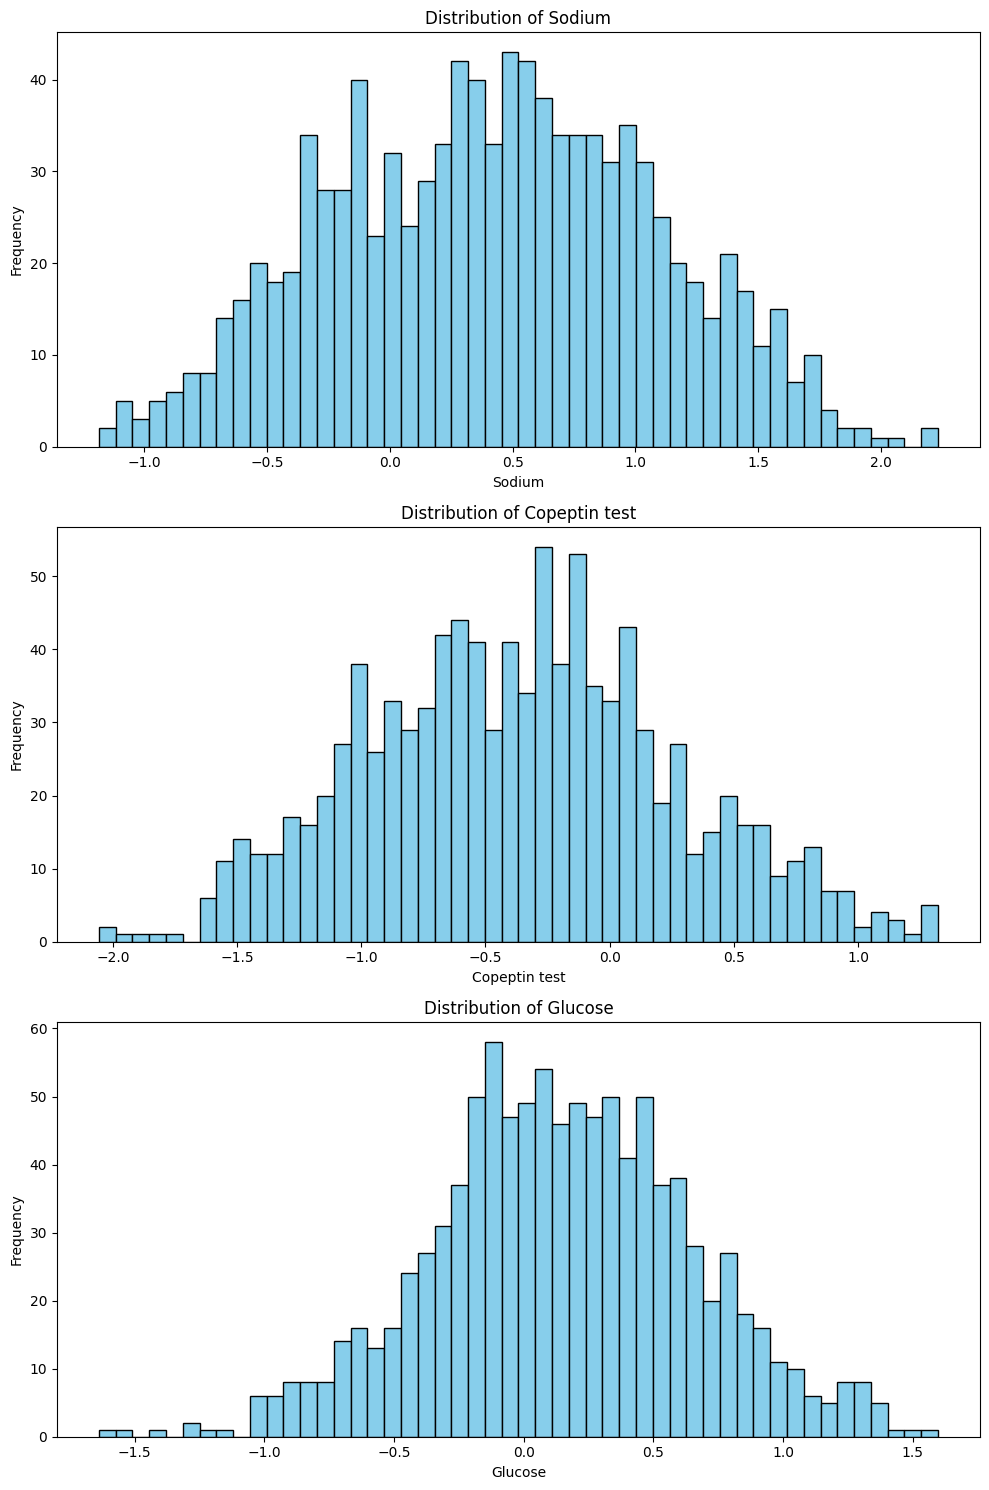

In [12]:
import matplotlib.pyplot as plt

# Plot distributions of the affected columns
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

columns = ['Sodium', 'Copeptin test', 'Glucose']

for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Class imbalance

The class distribution for the outcome variable (Diabetes Insipidus) is almost balanced:
- Class 0: 50.3%
- Class 1: 49.7%

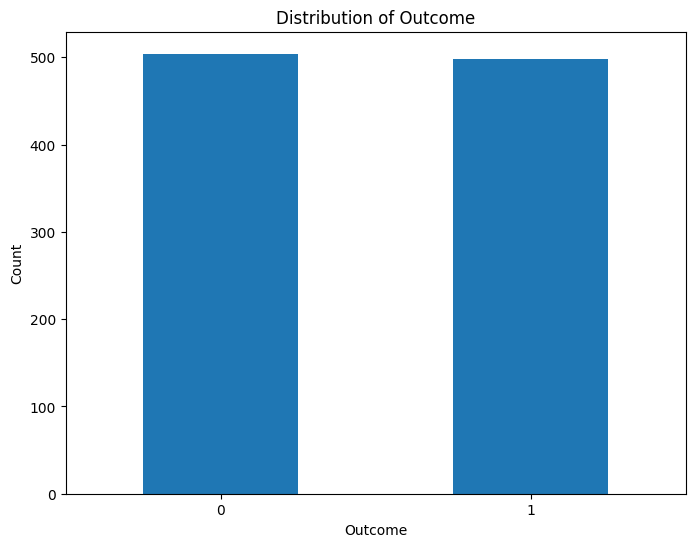

In [13]:
# Convert 'Outcome' to categorical for the pair plot
df['Outcome'] = df['Outcome'].astype('category')

# Plotting the distribution of the outcome variable
plt.figure(figsize=(8, 6))
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

A bar plot showing the count of each class (0 and 1) in the Outcome variable, indicating a balanced distribution.

### Missing data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype   
---  ------                                               --------------  -----   
 0   Urine osmolality                                     1002 non-null   float64 
 1   Sodium                                               1002 non-null   float64 
 2   Copeptin test                                        1002 non-null   float64 
 3   Glucose                                              1002 non-null   float64 
 4   Feature eng. of sodium and copeptin                  1002 non-null   float64 
 5   Time between first symptoms and diagnosis (in days)  1002 non-null   int64   
 6   Outcome                                              1002 non-null   category
dtypes: category(1), float64(5), int64(1)
memory usage: 48.2 KB


There are no missing values in the dataset.

### Table One statistics

These are the variables in the dataset:

- Urine osmolality - Continuous
- Sodium - Continuous
- Copeptin test - Continuous
- Glucose - Continuous
- Feature eng. of sodium and copeptin - Continuous
- Time between first symptoms and diagnosis (in days) - Continuous
- Outcome - Categorical (0 or 1)

In [15]:
mytable = TableOne(df, groupby='Outcome')
print(mytable.tabulate(tablefmt = "fancy_grid"))

╒════════════════════════════════════════════════════════════════╤════╤═══════════╤═════════════╤════════════╤═════════════╕
│                                                                │    │ Missing   │ Overall     │ 0          │ 1           │
╞════════════════════════════════════════════════════════════════╪════╪═══════════╪═════════════╪════════════╪═════════════╡
│ n                                                              │    │           │ 1002        │ 504        │ 498         │
├────────────────────────────────────────────────────────────────┼────┼───────────┼─────────────┼────────────┼─────────────┤
│ Urine osmolality, mean (SD)                                    │    │ 0         │ 2.3 (44.6)  │ 2.1 (44.5) │ 2.6 (44.7)  │
├────────────────────────────────────────────────────────────────┼────┼───────────┼─────────────┼────────────┼─────────────┤
│ Sodium, mean (SD)                                              │    │ 0         │ 0.4 (0.7)   │ -0.0 (0.5) │ 0.9 (0.5)   │


Based on the above Table One it looks like there might be some significant issue with "Time between first symptoms and diagnosis (in days), mean (SD)" variable. The mean and standard deviation for “Time between first symptoms and diagnosis (in days)” differ significantly between the overall dataset and the two classes in the “Outcome” variable (0 and 1).

Potential Reasons for This Discrepancy:

1.	Immediate Diagnosis in Outcome 0:
- For individuals who do not have Diabetes Insipidus (Outcome 0), the “Time between first symptoms and diagnosis” is often 0. This suggests that for these individuals, there might have been no delay between the onset of symptoms and diagnosis, possibly because their symptoms did not persist or were not severe enough to warrant a delay.
2.	Delayed Diagnosis in Outcome 1:
- For individuals diagnosed with Diabetes Insipidus (Outcome 1), there is a considerable delay (mean of 49.3 days) between the first symptoms and the diagnosis. This delay could be due to the need for extended observation, testing, and ruling out other conditions before confirming a diagnosis of Diabetes Insipidus.
3.	Symptom Severity and Persistence:
- The severity and persistence of symptoms might be more significant in individuals with Outcome 1, leading to a longer diagnostic process. For those without the condition (Outcome 0), symptoms might resolve quickly or be attributed to less severe conditions, leading to immediate diagnosis or no need for prolonged diagnostic processes.
4.	Healthcare Access and Diagnostic Protocols:
- Differences in healthcare access, patient awareness, and diagnostic protocols can contribute to the time taken for diagnosis. Individuals with more apparent or severe symptoms might receive faster attention and a quicker diagnosis once the symptoms persist beyond a certain period.
5.	Misclassification or Data Entry:
- There might be instances of misclassification or errors in data entry, where the time to diagnosis is recorded as zero incorrectly for Outcome 0. This could skew the statistics, although this is less likely if the data has been thoroughly checked for accuracy.
6.	Clinical Pathways:
- The clinical pathways and protocols for diagnosing Diabetes Insipidus might inherently take longer compared to other conditions, leading to a higher mean time for diagnosis in individuals with Outcome 1.


Let's continue with EDA:

### Distributions

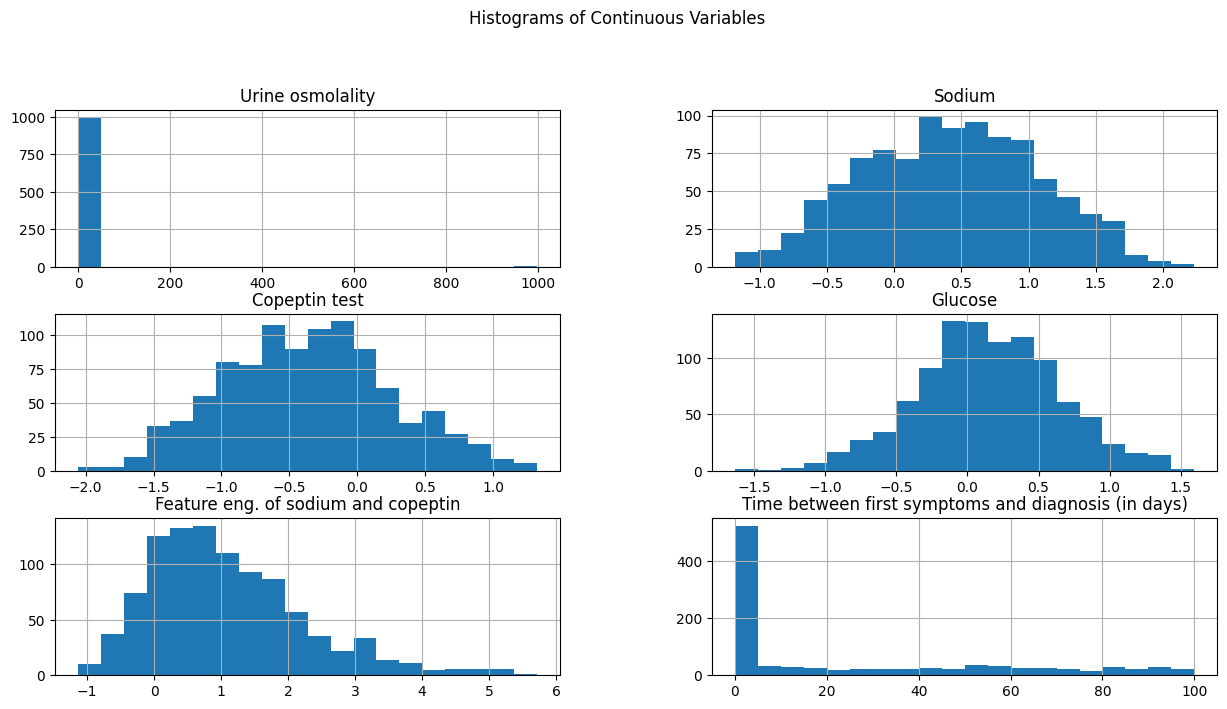

In [16]:
# Histograms for continuous variables
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_columns].hist(bins=20, figsize=(15, 10), layout=(4, 2))
plt.suptitle('Histograms of Continuous Variables')
plt.show()

Urine osmolality and Time between first symptoms need to be inspected further. Other variables seem to have normal distribution.

### Most frequent values

Before we work on outliers for Urine osmolality, there seems to be an issue with other values beying overrepresented. Let's check the most frequent values.

In [17]:
most_frequent_value = df['Urine osmolality'].mode()[0]
frequency = (df['Urine osmolality'] == most_frequent_value).sum()
percentage = (frequency / len(df)) * 100

print(f"Most Frequent Value: {most_frequent_value}")
print(f"Frequency: {frequency}")
print(f"Percentage: {percentage:.2f}%")

Most Frequent Value: 0.3455941260515833
Frequency: 100
Percentage: 9.98%


It is unlikely that

### Outliers

<Figure size 1500x1200 with 0 Axes>

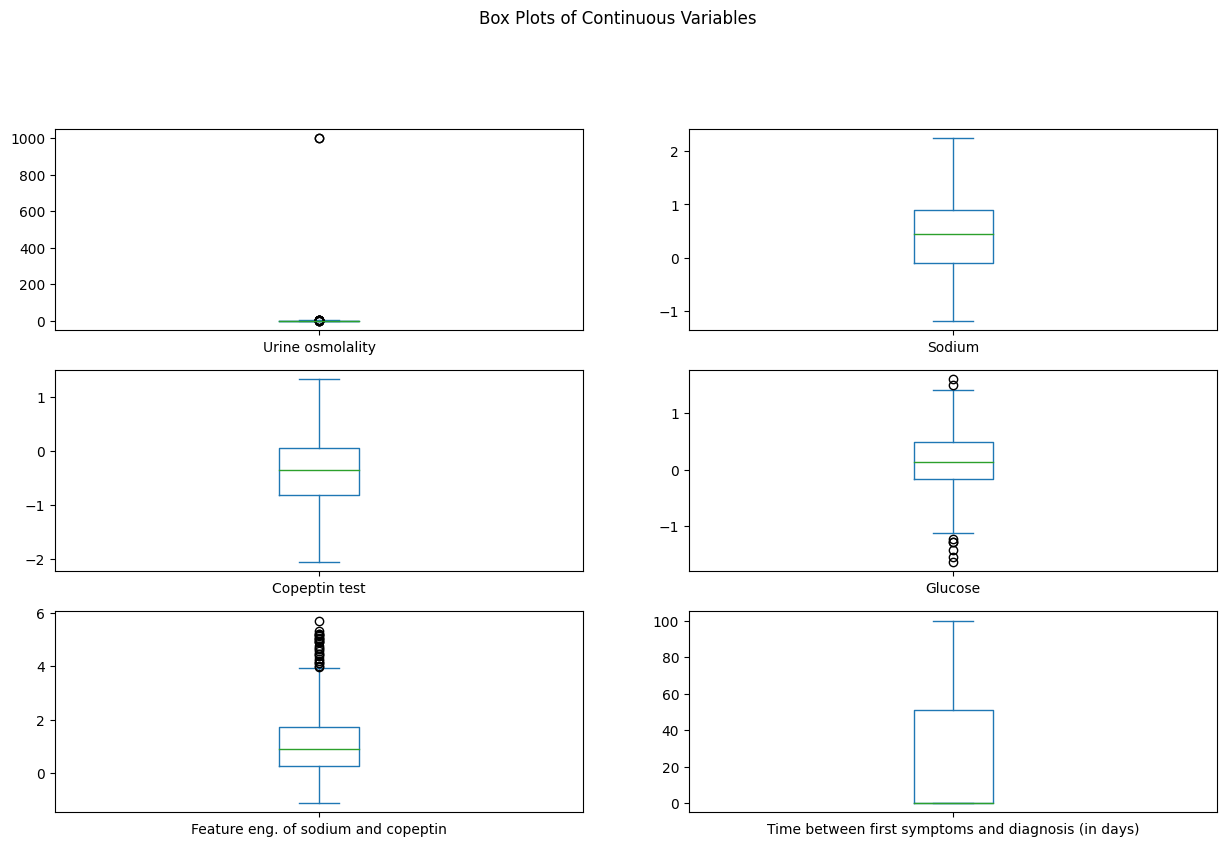

In [18]:
# Box plots for continuous variables
plt.figure(figsize=(15, 12))
df[numeric_columns].plot(kind='box', subplots=True, layout=(4, 2), figsize=(15, 12))
plt.suptitle('Box Plots of Continuous Variables')
plt.show()

There seem to be outliers in the dataset. Let's investigate more.

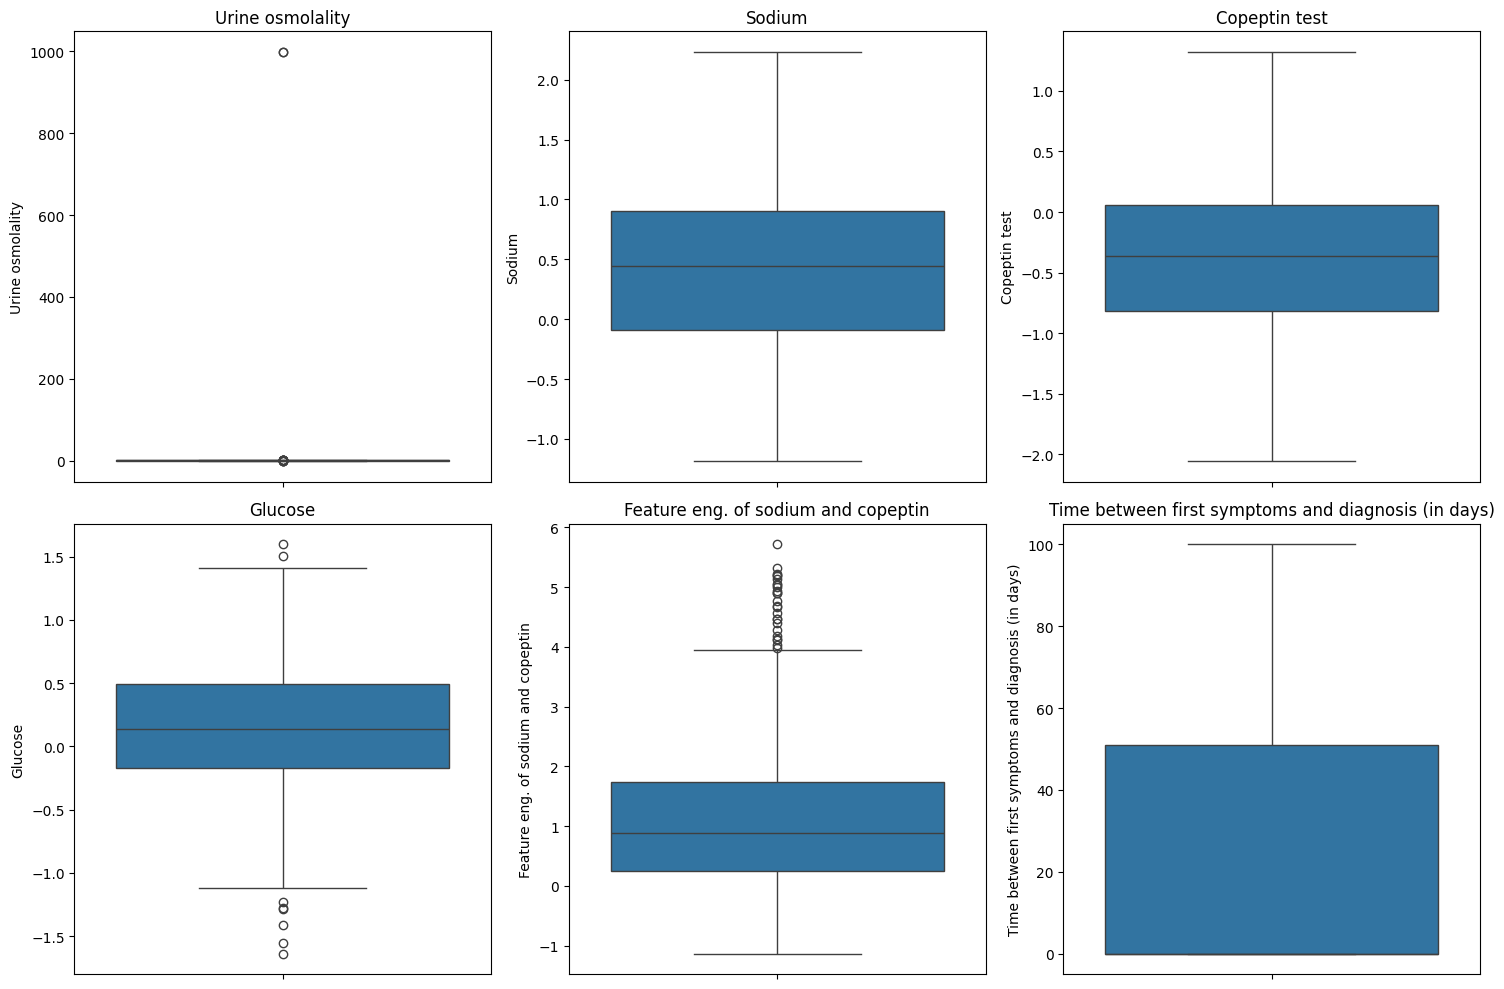

Urine osmolality                                       13
Sodium                                                  0
Copeptin test                                           0
Glucose                                                 8
Feature eng. of sodium and copeptin                    25
Time between first symptoms and diagnosis (in days)     0
dtype: int64

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing potential outliers using box plots for each feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# List of features
features = ['Urine osmolality', 'Sodium', 'Copeptin test', 'Glucose',
            'Feature eng. of sodium and copeptin',
            'Time between first symptoms and diagnosis (in days)']

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(y=df[features[i]], ax=ax)
    ax.set_title(features[i])

plt.tight_layout()
plt.show()

# Identifying outliers using the IQR method
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points that lie below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).sum()

outliers

We will leave the outliers for now and see if they influence our models below.The numbers are pretty low though but might be significant.

Reference:
- [https://www.quora.com/What-are-methods-to-make-a-predictive-model-more-robust-to-outliers](https://www.quora.com/What-are-methods-to-make-a-predictive-model-more-robust-to-outliers)
- [Guidelines for Removing and Handling Outliers in Data by Jim Frost](https://statisticsbyjim.com/basics/remove-outliers)

### Correlations

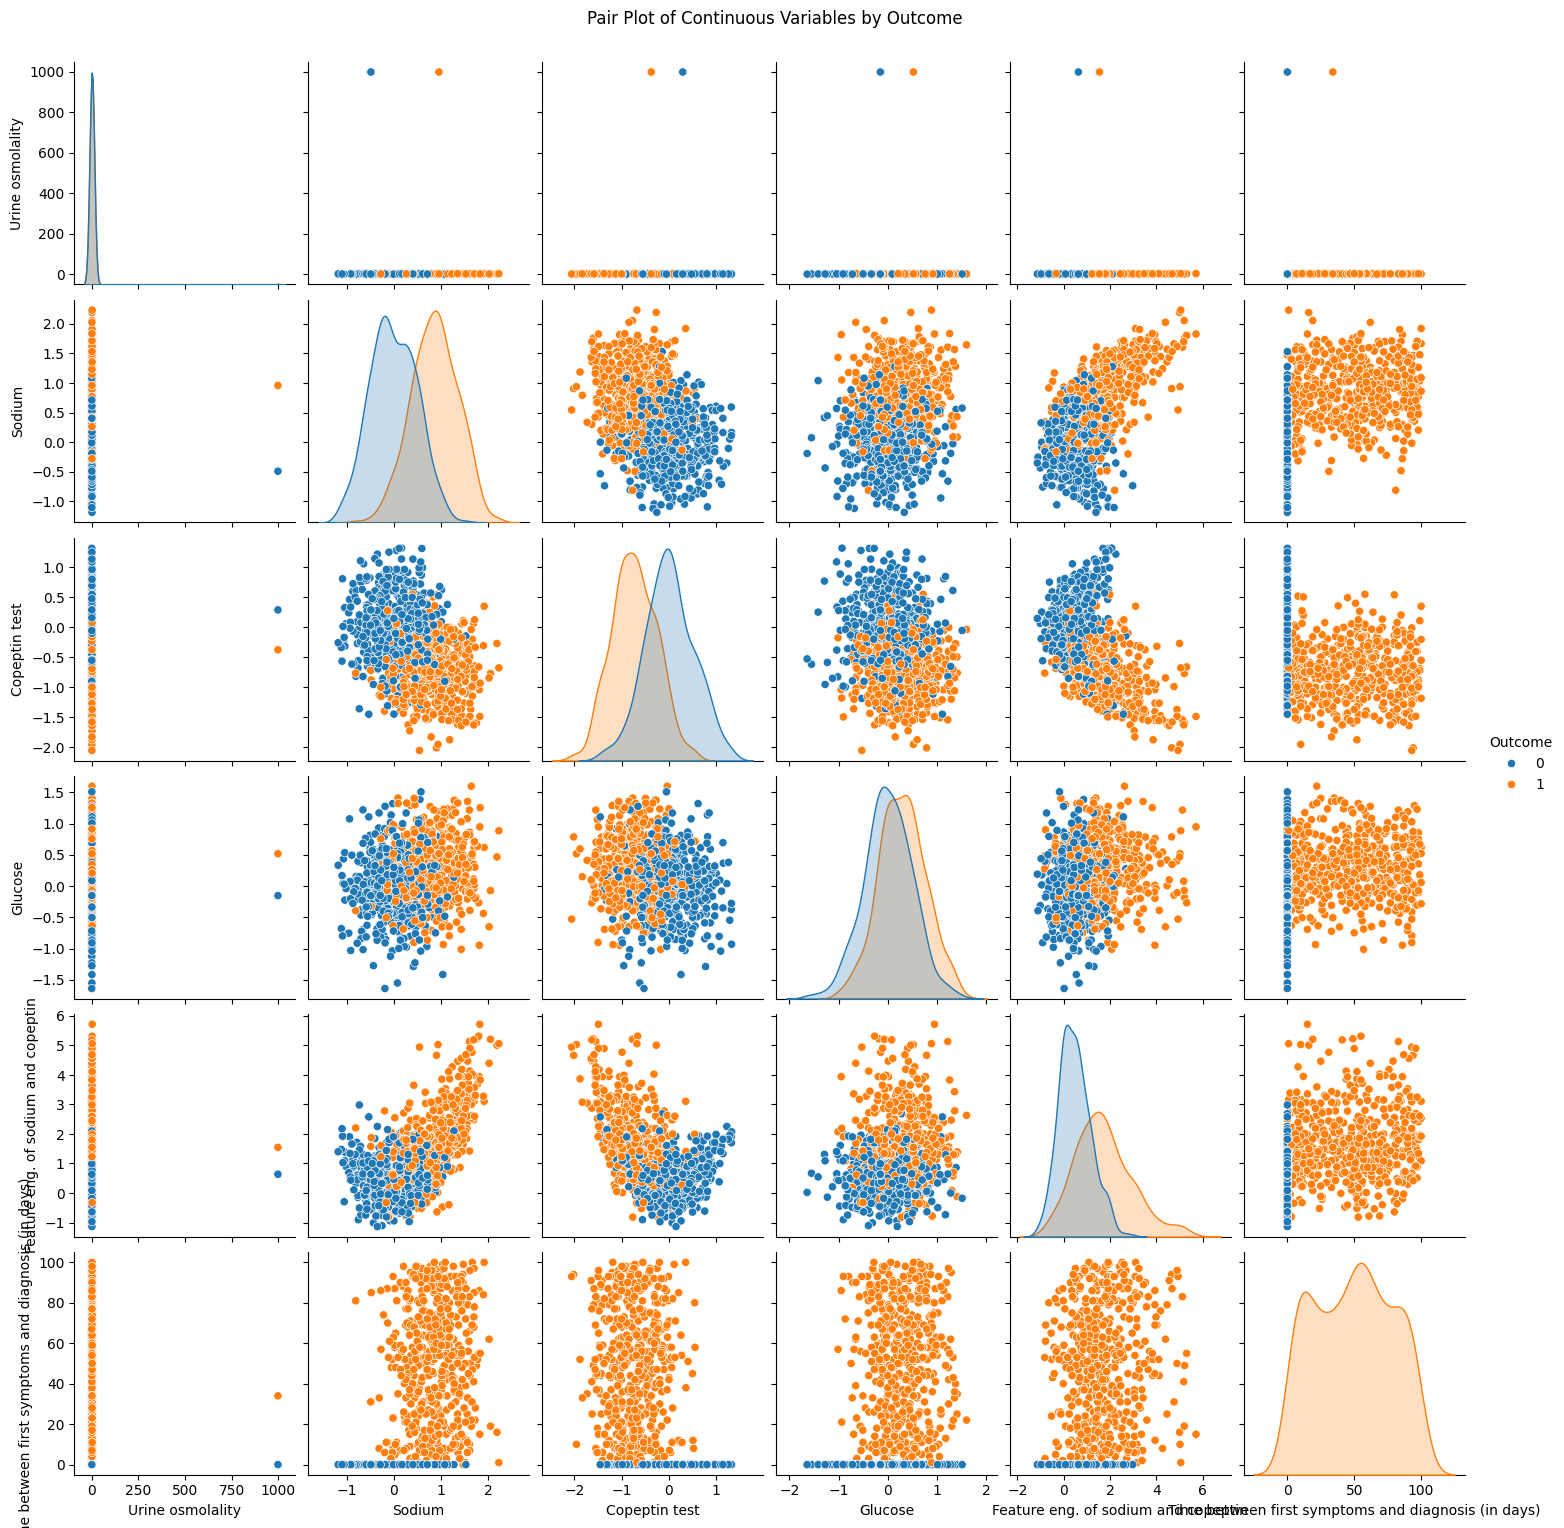

In [20]:
# Pair plot for all continuous variables colored by Outcome
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Continuous Variables by Outcome', y=1.02)
plt.show()

From above plot:
- Sodium levels increase, urine osmolality also increases.
- Patients with Outcome 1 (Diabetes Insipidus) tend to have lower urine osmolality, while those with Outcome 0 have a wider range or higher values.
- Sodium and Outcome - there might be a noticeable difference in sodium levels between the two outcomes.
- Copeptin Test and Outcome - separation where one outcome has significantly different copeptin levels, helping to distinguish between the two groups.

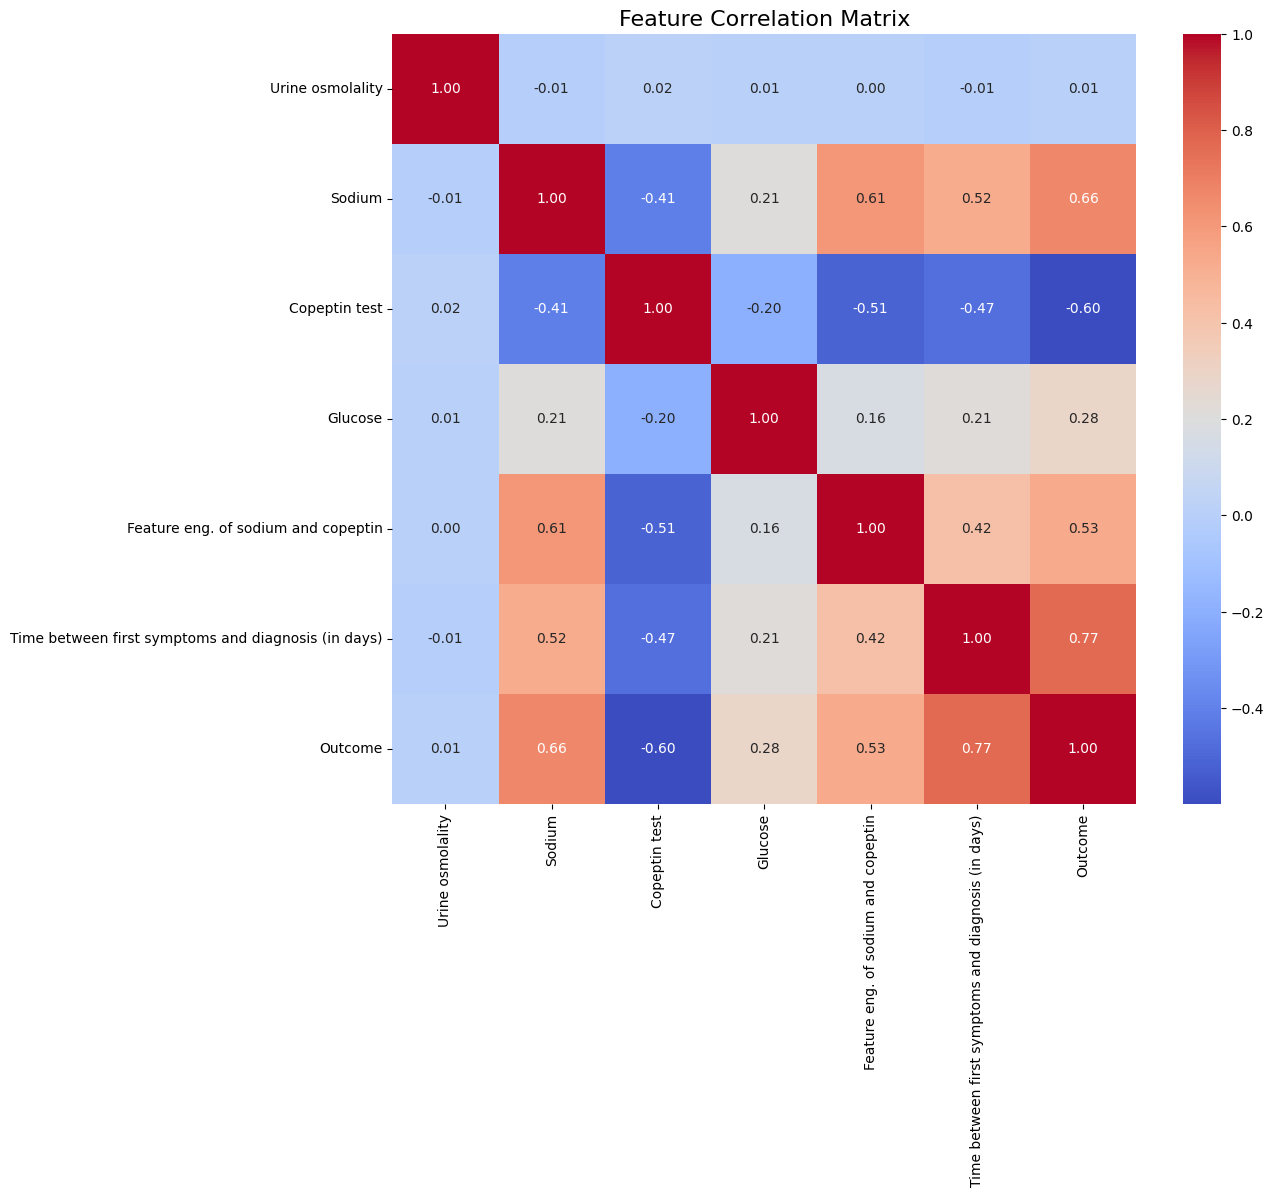

In [21]:
# Calculate the correlation matrix for the modified dataset
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()

There is a correlation between variables Time between first symptoms and diagnosis (in days), sodium, copeptin, and feature engineered variable with the outcome variable. Time between first symptoms and diagnosis (in days) is the mostly correlated variable.


There might be multicolinearity between variables also but we will check it later during the model training.

## Evaluation of machine learning approaches

### Feature Importance

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [23]:
# Separate features and target from the original dataset
X = df.drop(columns='Outcome')
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model on the original data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
feature_importance_df

,Feature,Importance
5,Time between first symptoms and diagnosis (in ...,0.630724
1,Sodium,0.162035
2,Copeptin test,0.080193
4,Feature eng. of sodium and copeptin,0.069618
0,Urine osmolality,0.046600
3,Glucose,0.010829


- Time between first symptoms and diagnosis (in days): This feature is the most important for predicting Diabetes Insipidus. We will use it for our model training first but next step will be to drop it as given the issues with that variable our models will most likely perform no better than dummy model or overfit significantly.
- Sodium and Copeptin test: These biomarkers are also significant, aligning with their known physiological relevance to DI.
- Urine osmolality: Despite being crucial for DI diagnosis clinically, it appears less important in the Random Forest model, possibly due to interactions with other features.
- Glucose: Least important, supporting the idea that it is more relevant for differentiating from diabetes mellitus rather than diagnosing DI.

### Dummy classifier comparison with other models.

In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Cross-validation and training for Logistic Regression
log_reg.fit(X_train, y_train)
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
y_pred_log_reg = log_reg.predict(X_test)
log_reg_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'F1 Score': f1_score(y_test, y_pred_log_reg)
}

# Cross-validation and training for Random Forest
rf.fit(X_train, y_train)
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
y_pred_rf = rf.predict(X_test)
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf)
}

# Cross-validation and training for Gradient Boosting
gb.fit(X_train, y_train)
gb_cv_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='accuracy')
y_pred_gb = gb.predict(X_test)
gb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1 Score': f1_score(y_test, y_pred_gb)
}

# Cross-validation and training for Dummy Classifier
dummy_clf.fit(X_train, y_train)
dummy_cv_scores = cross_val_score(dummy_clf, X_train, y_train, cv=5, scoring='accuracy')
y_pred_dummy = dummy_clf.predict(X_test)
dummy_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_dummy),
    'Precision': precision_score(y_test, y_pred_dummy, zero_division=1),
    'Recall': recall_score(y_test, y_pred_dummy),
    'F1 Score': f1_score(y_test, y_pred_dummy)
}

# Compile results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [log_reg_metrics['Accuracy'], rf_metrics['Accuracy'], gb_metrics['Accuracy']],
    'Precision': [log_reg_metrics['Precision'], rf_metrics['Precision'], gb_metrics['Precision']],
    'Recall': [log_reg_metrics['Recall'], rf_metrics['Recall'], gb_metrics['Recall']],
    'F1 Score': [log_reg_metrics['F1 Score'], rf_metrics['F1 Score'], gb_metrics['F1 Score']],
    'Cross-Validation Accuracy': [log_reg_cv_scores.mean(), rf_cv_scores.mean(), gb_cv_scores.mean()]
})

# Append dummy classifier results
results_with_dummy = pd.concat([results, pd.DataFrame({
    'Model': ['Dummy Classifier'],
    'Accuracy': [dummy_metrics['Accuracy']],
    'Precision': [dummy_metrics['Precision']],
    'Recall': [dummy_metrics['Recall']],
    'F1 Score': [dummy_metrics['F1 Score']],
    'Cross-Validation Accuracy': [dummy_cv_scores.mean()]
})], ignore_index=True)

# Display the results
print(results_with_dummy)

                 Model  Accuracy  Precision  Recall  F1 Score  \
0  Logistic Regression  1.000000        1.0     1.0       1.0   
1        Random Forest  1.000000        1.0     1.0       1.0   
2    Gradient Boosting  1.000000        1.0     1.0       1.0   
3     Dummy Classifier  0.482587        1.0     0.0       0.0   

   Cross-Validation Accuracy  
0                   0.991258  
1                   0.996258  
2                   0.992508  
3                   0.508113  


The models are better than dummy classifier which breaks the previous hypothesis. However the models are most likely overfitting hence we will drop this variable for now and retest the performance.

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Remove the "Time between first symptoms and diagnosis" feature
X_reduced = df.drop(columns=['Outcome', 'Time between first symptoms and diagnosis (in days)'])
y_reduced = df['Outcome']

# Split the data into training and testing sets
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Initialize models
log_reg_reduced = LogisticRegression(random_state=42, max_iter=1000)
rf_reduced = RandomForestClassifier(random_state=42)
gb_reduced = GradientBoostingClassifier(random_state=42)
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Cross-validation and training for Logistic Regression
log_reg_reduced.fit(X_train_reduced, y_train_reduced)
log_reg_cv_scores_reduced = cross_val_score(log_reg_reduced, X_train_reduced, y_train_reduced, cv=5, scoring='accuracy')
y_pred_log_reg_reduced = log_reg_reduced.predict(X_test_reduced)
log_reg_metrics_reduced = {
    'Accuracy': accuracy_score(y_test_reduced, y_pred_log_reg_reduced),
    'Precision': precision_score(y_test_reduced, y_pred_log_reg_reduced),
    'Recall': recall_score(y_test_reduced, y_pred_log_reg_reduced),
    'F1 Score': f1_score(y_test_reduced, y_pred_log_reg_reduced)
}

# Cross-validation and training for Random Forest
rf_reduced.fit(X_train_reduced, y_train_reduced)
rf_cv_scores_reduced = cross_val_score(rf_reduced, X_train_reduced, y_train_reduced, cv=5, scoring='accuracy')
y_pred_rf_reduced = rf_reduced.predict(X_test_reduced)
rf_metrics_reduced = {
    'Accuracy': accuracy_score(y_test_reduced, y_pred_rf_reduced),
    'Precision': precision_score(y_test_reduced, y_pred_rf_reduced),
    'Recall': recall_score(y_test_reduced, y_pred_rf_reduced),
    'F1 Score': f1_score(y_test_reduced, y_pred_rf_reduced)
}

# Cross-validation and training for Gradient Boosting
gb_reduced.fit(X_train_reduced, y_train_reduced)
gb_cv_scores_reduced = cross_val_score(gb_reduced, X_train_reduced, y_train_reduced, cv=5, scoring='accuracy')
y_pred_gb_reduced = gb_reduced.predict(X_test_reduced)
gb_metrics_reduced = {
    'Accuracy': accuracy_score(y_test_reduced, y_pred_gb_reduced),
    'Precision': precision_score(y_test_reduced, y_pred_gb_reduced),
    'Recall': recall_score(y_test_reduced, y_pred_gb_reduced),
    'F1 Score': f1_score(y_test_reduced, y_pred_gb_reduced)
}

# Cross-validation and training for Dummy Classifier
dummy_clf.fit(X_train_reduced, y_train_reduced)
dummy_cv_scores = cross_val_score(dummy_clf, X_train_reduced, y_train_reduced, cv=5, scoring='accuracy')
y_pred_dummy = dummy_clf.predict(X_test_reduced)
dummy_metrics = {
    'Accuracy': accuracy_score(y_test_reduced, y_pred_dummy),
    'Precision': precision_score(y_test_reduced, y_pred_dummy, zero_division=1),
    'Recall': recall_score(y_test_reduced, y_pred_dummy),
    'F1 Score': f1_score(y_test_reduced, y_pred_dummy)
}

# Compile results
results_reduced = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [log_reg_metrics_reduced['Accuracy'], rf_metrics_reduced['Accuracy'], gb_metrics_reduced['Accuracy']],
    'Precision': [log_reg_metrics_reduced['Precision'], rf_metrics_reduced['Precision'], gb_metrics_reduced['Precision']],
    'Recall': [log_reg_metrics_reduced['Recall'], rf_metrics_reduced['Recall'], gb_metrics_reduced['Recall']],
    'F1 Score': [log_reg_metrics_reduced['F1 Score'], rf_metrics_reduced['F1 Score'], gb_metrics_reduced['F1 Score']],
    'Cross-Validation Accuracy': [log_reg_cv_scores_reduced.mean(), rf_cv_scores_reduced.mean(), gb_cv_scores_reduced.mean()]
})

# Append dummy classifier results
results_with_dummy_reduced = pd.concat([results_reduced, pd.DataFrame({
    'Model': ['Dummy Classifier'],
    'Accuracy': [dummy_metrics['Accuracy']],
    'Precision': [dummy_metrics['Precision']],
    'Recall': [dummy_metrics['Recall']],
    'F1 Score': [dummy_metrics['F1 Score']],
    'Cross-Validation Accuracy': [dummy_cv_scores.mean()]
})], ignore_index=True)

# Display the results
print(results_with_dummy_reduced)

                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.915423   0.922330  0.913462  0.917874   
1        Random Forest  0.940299   0.969388  0.913462  0.940594   
2    Gradient Boosting  0.920398   0.948980  0.894231  0.920792   
3     Dummy Classifier  0.482587   1.000000  0.000000  0.000000   

   Cross-Validation Accuracy  
0                   0.872624  
1                   0.885140  
2                   0.876405  
3                   0.508113  


All the models lost performance significantly but still perform well even without the variable “Time between first symptoms and diagnosis”. We will see if removing outliers will improve model performance. Since models with variable “Time between first symptoms and diagnosis” were definitely overfitting we will drop it for our future analysis.

### After removal of outliers.

#### Normalisation

We will use normalisation as a way to work with outliers.

In [26]:
from sklearn.preprocessing import RobustScaler

# Normalize the outliers using RobustScaler
scaler = RobustScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Remove the "Time between first symptoms and diagnosis" feature
X_normalized_reduced = X_normalized.drop(columns='Time between first symptoms and diagnosis (in days)')
y_normalized_reduced = df['Outcome']

# Split the data into training and testing sets
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized_reduced, y_normalized_reduced, test_size=0.2, random_state=42)

# Initialize models
log_reg_norm = LogisticRegression(random_state=42, max_iter=1000)
rf_norm = RandomForestClassifier(random_state=42)
gb_norm = GradientBoostingClassifier(random_state=42)
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)

# Cross-validation and training for Logistic Regression
log_reg_norm.fit(X_train_norm, y_train_norm)
log_reg_cv_scores_norm = cross_val_score(log_reg_norm, X_train_norm, y_train_norm, cv=5, scoring='accuracy')
y_pred_log_reg_norm = log_reg_norm.predict(X_test_norm)
log_reg_metrics_norm = {
    'Accuracy': accuracy_score(y_test_norm, y_pred_log_reg_norm),
    'Precision': precision_score(y_test_norm, y_pred_log_reg_norm),
    'Recall': recall_score(y_test_norm, y_pred_log_reg_norm),
    'F1 Score': f1_score(y_test_norm, y_pred_log_reg_norm)
}

# Cross-validation and training for Random Forest
rf_norm.fit(X_train_norm, y_train_norm)
rf_cv_scores_norm = cross_val_score(rf_norm, X_train_norm, y_train_norm, cv=5, scoring='accuracy')
y_pred_rf_norm = rf_norm.predict(X_test_norm)
rf_metrics_norm = {
    'Accuracy': accuracy_score(y_test_norm, y_pred_rf_norm),
    'Precision': precision_score(y_test_norm, y_pred_rf_norm),
    'Recall': recall_score(y_test_norm, y_pred_rf_norm),
    'F1 Score': f1_score(y_test_norm, y_pred_rf_norm)
}

# Cross-validation and training for Gradient Boosting
gb_norm.fit(X_train_norm, y_train_norm)
gb_cv_scores_norm = cross_val_score(gb_norm, X_train_norm, y_train_norm, cv=5, scoring='accuracy')
y_pred_gb_norm = gb_norm.predict(X_test_norm)
gb_metrics_norm = {
    'Accuracy': accuracy_score(y_test_norm, y_pred_gb_norm),
    'Precision': precision_score(y_test_norm, y_pred_gb_norm),
    'Recall': recall_score(y_test_norm, y_pred_gb_norm),
    'F1 Score': f1_score(y_test_norm, y_pred_gb_norm)
}

# Cross-validation and training for Dummy Classifier
dummy_clf.fit(X_train_norm, y_train_norm)
dummy_cv_scores_norm = cross_val_score(dummy_clf, X_train_norm, y_train_norm, cv=5, scoring='accuracy')
y_pred_dummy_norm = dummy_clf.predict(X_test_norm)
dummy_metrics_norm = {
    'Accuracy': accuracy_score(y_test_norm, y_pred_dummy_norm),
    'Precision': precision_score(y_test_norm, y_pred_dummy_norm, zero_division=1),
    'Recall': recall_score(y_test_norm, y_pred_dummy_norm),
    'F1 Score': f1_score(y_test_norm, y_pred_dummy_norm)
}

# Compile results
results_norm = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [log_reg_metrics_norm['Accuracy'], rf_metrics_norm['Accuracy'], gb_metrics_norm['Accuracy']],
    'Precision': [log_reg_metrics_norm['Precision'], rf_metrics_norm['Precision'], gb_metrics_norm['Precision']],
    'Recall': [log_reg_metrics_norm['Recall'], rf_metrics_norm['Recall'], gb_metrics_norm['Recall']],
    'F1 Score': [log_reg_metrics_norm['F1 Score'], rf_metrics_norm['F1 Score'], gb_metrics_norm['F1 Score']],
    'Cross-Validation Accuracy': [log_reg_cv_scores_norm.mean(), rf_cv_scores_norm.mean(), gb_cv_scores_norm.mean()]
})

# Append dummy classifier results
results_with_dummy_norm = pd.concat([results_norm, pd.DataFrame({
    'Model': ['Dummy Classifier'],
    'Accuracy': [dummy_metrics_norm['Accuracy']],
    'Precision': [dummy_metrics_norm['Precision']],
    'Recall': [dummy_metrics_norm['Recall']],
    'F1 Score': [dummy_metrics_norm['F1 Score']],
    'Cross-Validation Accuracy': [dummy_cv_scores_norm.mean()]
})], ignore_index=True)

# Display the results
print(results_with_dummy_norm)

                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.915423   0.922330  0.913462  0.917874   
1        Random Forest  0.940299   0.969388  0.913462  0.940594   
2    Gradient Boosting  0.920398   0.948980  0.894231  0.920792   
3     Dummy Classifier  0.482587   1.000000  0.000000  0.000000   

   Cross-Validation Accuracy  
0                   0.872624  
1                   0.885140  
2                   0.876405  
3                   0.508113  


The results seem to be exactly the same as before normalisation. We will use other method of dealing with outliers.

#### Outlier removal

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure we only calculate IQR for numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Identify and remove outliers using the IQR method
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
data_no_outliers = df[~outliers]

# Remove the "Time between first symptoms and diagnosis" feature
X_no_outliers = data_no_outliers.drop(columns=['Outcome', 'Time between first symptoms and diagnosis (in days)'])
y_no_outliers = data_no_outliers['Outcome']

# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Initialize models
log_reg_no_outliers = LogisticRegression(random_state=42, max_iter=1000)
rf_no_outliers = RandomForestClassifier(random_state=42)
gb_no_outliers = GradientBoostingClassifier(random_state=42)
dummy_clf_no_outliers = DummyClassifier(strategy="most_frequent", random_state=42)

# Cross-validation and training for Logistic Regression
log_reg_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
log_reg_cv_scores_no_outliers = cross_val_score(log_reg_no_outliers, X_train_no_outliers, y_train_no_outliers, cv=5, scoring='accuracy')
y_pred_log_reg_no_outliers = log_reg_no_outliers.predict(X_test_no_outliers)
log_reg_metrics_no_outliers = {
    'Accuracy': accuracy_score(y_test_no_outliers, y_pred_log_reg_no_outliers),
    'Precision': precision_score(y_test_no_outliers, y_pred_log_reg_no_outliers),
    'Recall': recall_score(y_test_no_outliers, y_pred_log_reg_no_outliers),
    'F1 Score': f1_score(y_test_no_outliers, y_pred_log_reg_no_outliers)
}

# Cross-validation and training for Random Forest
rf_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
rf_cv_scores_no_outliers = cross_val_score(rf_no_outliers, X_train_no_outliers, y_train_no_outliers, cv=5, scoring='accuracy')
y_pred_rf_no_outliers = rf_no_outliers.predict(X_test_no_outliers)
rf_metrics_no_outliers = {
    'Accuracy': accuracy_score(y_test_no_outliers, y_pred_rf_no_outliers),
    'Precision': precision_score(y_test_no_outliers, y_pred_rf_no_outliers),
    'Recall': recall_score(y_test_no_outliers, y_pred_rf_no_outliers),
    'F1 Score': f1_score(y_test_no_outliers, y_pred_rf_no_outliers)
}

# Cross-validation and training for Gradient Boosting
gb_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
gb_cv_scores_no_outliers = cross_val_score(gb_no_outliers, X_train_no_outliers, y_train_no_outliers, cv=5, scoring='accuracy')
y_pred_gb_no_outliers = gb_no_outliers.predict(X_test_no_outliers)
gb_metrics_no_outliers = {
    'Accuracy': accuracy_score(y_test_no_outliers, y_pred_gb_no_outliers),
    'Precision': precision_score(y_test_no_outliers, y_pred_gb_no_outliers),
    'Recall': recall_score(y_test_no_outliers, y_pred_gb_no_outliers),
    'F1 Score': f1_score(y_test_no_outliers, y_pred_gb_no_outliers)
}

# Cross-validation and training for Dummy Classifier
dummy_clf_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
dummy_cv_scores_no_outliers = cross_val_score(dummy_clf_no_outliers, X_train_no_outliers, y_train_no_outliers, cv=5, scoring='accuracy')
y_pred_dummy_no_outliers = dummy_clf_no_outliers.predict(X_test_no_outliers)
dummy_metrics_no_outliers = {
    'Accuracy': accuracy_score(y_test_no_outliers, y_pred_dummy_no_outliers),
    'Precision': precision_score(y_test_no_outliers, y_pred_dummy_no_outliers, zero_division=1),
    'Recall': recall_score(y_test_no_outliers, y_pred_dummy_no_outliers),
    'F1 Score': f1_score(y_test_no_outliers, y_pred_dummy_no_outliers)
}

# Compile results
results_no_outliers = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [log_reg_metrics_no_outliers['Accuracy'], rf_metrics_no_outliers['Accuracy'], gb_metrics_no_outliers['Accuracy']],
    'Precision': [log_reg_metrics_no_outliers['Precision'], rf_metrics_no_outliers['Precision'], gb_metrics_no_outliers['Precision']],
    'Recall': [log_reg_metrics_no_outliers['Recall'], rf_metrics_no_outliers['Recall'], gb_metrics_no_outliers['Recall']],
    'F1 Score': [log_reg_metrics_no_outliers['F1 Score'], rf_metrics_no_outliers['F1 Score'], gb_metrics_no_outliers['F1 Score']],
    'Cross-Validation Accuracy': [log_reg_cv_scores_no_outliers.mean(), rf_cv_scores_no_outliers.mean(), gb_cv_scores_no_outliers.mean()]
})

# Append dummy classifier results
results_with_dummy_no_outliers = pd.concat([results_no_outliers, pd.DataFrame({
    'Model': ['Dummy Classifier'],
    'Accuracy': [dummy_metrics_no_outliers['Accuracy']],
    'Precision': [dummy_metrics_no_outliers['Precision']],
    'Recall': [dummy_metrics_no_outliers['Recall']],
    'F1 Score': [dummy_metrics_no_outliers['F1 Score']],
    'Cross-Validation Accuracy': [dummy_cv_scores_no_outliers.mean()]
})], ignore_index=True)

# Display the results
print(results_with_dummy_no_outliers)

                 Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  0.906250   0.901099  0.901099  0.901099   
1        Random Forest  0.916667   0.941176  0.879121  0.909091   
2    Gradient Boosting  0.911458   0.920455  0.890110  0.905028   
3     Dummy Classifier  0.526042   1.000000  0.000000  0.000000   

   Cross-Validation Accuracy  
0                   0.892810  
1                   0.890196  
2                   0.879739  
3                   0.511111  


Performance slighly decreased. It looks like the slight decrease in performance might indicate that some of the removed outliers contained useful information for the prediction.

We will check feature importance again after outliers removal to see if there is any additional bias we could find.

In [28]:
# Feature importance with the current model setup
rf_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
importances_no_outliers = rf_no_outliers.feature_importances_
feature_importance_no_outliers_df = pd.DataFrame({'Feature': X_train_no_outliers.columns, 'Importance': importances_no_outliers})
feature_importance_no_outliers_df = feature_importance_no_outliers_df.sort_values(by='Importance', ascending=False)
print(feature_importance_no_outliers_df)

                               Feature  Importance
1                               Sodium    0.355738
2                        Copeptin test    0.263843
0                     Urine osmolality    0.176086
4  Feature eng. of sodium and copeptin    0.129988
3                              Glucose    0.074345


Sodium and Copeptin test are the most influential features, collectively accounting for approximately 62% of the feature importance. This suggests these biomarkers are strong predictors for the diagnosis.

Urine osmolality also plays a significant role, contributing about 17.6% to the model’s predictions. It is a clinically relevant marker for Diabetes Insipidus, which aligns with its importance in the model.



## Bias

Additional checks will need to be done to see if there are additional considerations. Possible things to further evaluate.

1.	Class Imbalance:
- At first glance, the dataset appears to have a relatively balanced class distribution between Outcome 0 and Outcome 1. However, it is essential to verify this with detailed counts and proportions to confirm.
2.	Sampling Bias:
- If the dataset does not represent the broader population accurately, there could be a sampling bias. For example, if the data is collected from a single geographic location or a specific demographic group, it may not generalize well to other populations.
3.	Measurement Bias:
- Measurement bias can occur if there are inconsistencies or inaccuracies in how biomarkers are measured. This could happen due to different equipment, procedures, or human errors in recording data.
4.	Observer Bias:
- Observer bias may arise if the diagnosis of Diabetes Insipidus is influenced by subjective judgment rather than objective criteria. This can be mitigated by ensuring that diagnosis protocols are standardized and consistent.
5.	Temporal Bias:
- If the data collection spans a long period, there may be temporal bias due to changes in diagnostic criteria, medical practices, or healthcare access over time.
6.	Missing Data:
- While the initial check showed no missing data, it is crucial to ensure that there are no systematic patterns in any missing data, as this could introduce bias.
7.	Outlier Impact:
- The presence of significant outliers in biomarkers such as Urine osmolality and “Feature eng. of sodium and copeptin” could skew the analysis and affect model performance.

# Conclusion

Based on the analysis below we found that the class is balanced in the dataset. Based on the analysis one very significant variable is affecting the analysis and at the same time might be not significant from the real world point of view.

Negative values for certain variables were discovered at the end and further removal or other techniques will need to be performed.

The random forest model performed the best and here are additional steps that could be taken in the future:

1.	Model Deployment:
- Deploy the Random Forest model given its robustness and effective use of the available features.
2.	Monitoring:
- Regularly monitor model performance to ensure it remains reliable over time and across different patient populations.
3.	Further Validation:
- Continue to validate with new data to ensure generalizability and robustness.